Nama: Sheila Amalia Burhanudin
<br>Username: sheilaamalia
<br>Dataset from Kaggle (https://www.kaggle.com/andrewmvd/animal-faces)

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt

In [2]:
# extract foto pada zip file
import zipfile, os
local_zip = '/content/drive/MyDrive/Dataset/animal_faces_all.zip'
base_dir = '/tmp/animal_faces_all/'
zip_ext = zipfile.ZipFile(local_zip, 'r')
zip_ext.extractall('/tmp')
zip_ext.close()

In [3]:
# cek direktori
os.listdir('/tmp/animal_faces_all/')

['cat', 'dog', 'wild']

In [4]:
cats_dir = os.path.join(base_dir, 'cat')
dogs_dir = os.path.join(base_dir, 'dog')
wild_dir = os.path.join(base_dir, 'wild')

num_cats = len(os.listdir(cats_dir))
num_dogs = len(os.listdir(dogs_dir))
num_wilds = len(os.listdir(wild_dir))

print('Jumlah foto cat = ', num_cats)
print('Jumlah foto dog = ', num_dogs)
print('Jumlah foto wild = ', num_wilds)

Jumlah foto cat =  5653
Jumlah foto dog =  5239
Jumlah foto wild =  5238


In [5]:
# melakukan image augmentation (Keras ImageDataGenerator)
train_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2  
)

val_gen = ImageDataGenerator(rescale=1./255, validation_split = 0.2) # ukuran validation set 20% dari total dataset 

In [6]:
# mempersiapkan data train dan data validation
train_generator = train_gen.flow_from_directory(
    base_dir, # direktori data target
    target_size = (100, 100),
    class_mode = 'categorical', # membagi 3 kelas kategori (cat, dog, wild)
    subset = 'training' # subset digunakan karena penggunaan validation_split pada data generator
)

validation_generator = val_gen.flow_from_directory(
    base_dir,
    target_size = (100, 100),
    class_mode = 'categorical',
    subset = 'validation' # subset digunakan karena penggunaan validation_split pada data generator
)

Found 12906 images belonging to 3 classes.
Found 3224 images belonging to 3 classes.


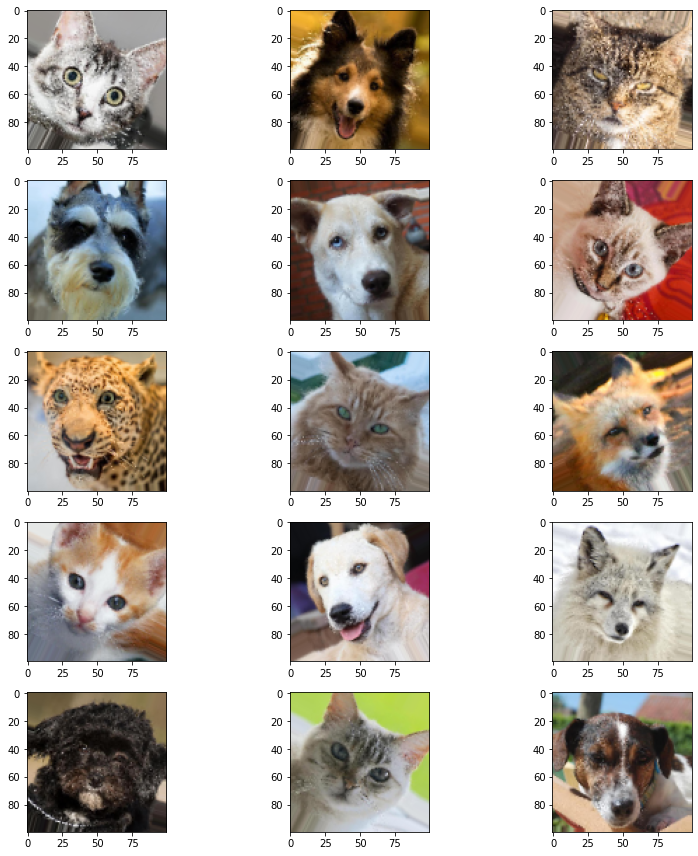

In [7]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])


In [9]:
# compile model
opt = tf.optimizers.Adam()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = opt,
    metrics = ['accuracy']               
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         2

In [10]:
# penggunaan callback
threshold_accuracy = 0.93
class custom_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        keys = list(logs.keys())
        if logs.get('accuracy') >= threshold_accuracy:
            print('\nEpoch ke-', epoch, '\nAkurasi final = %2.2f%%' %(logs['accuracy']*100))
            self.model.stop_training = True

In [11]:
# proses latih model dengan model.fit
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [custom_callbacks()]
)

Epoch 1/30
25/25 - 16s - loss: 1.1200 - accuracy: 0.3262 - val_loss: 1.0993 - val_accuracy: 0.2562
Epoch 2/30
25/25 - 15s - loss: 1.0932 - accuracy: 0.3975 - val_loss: 1.0932 - val_accuracy: 0.3500
Epoch 3/30
25/25 - 15s - loss: 1.0393 - accuracy: 0.4800 - val_loss: 0.9004 - val_accuracy: 0.4688
Epoch 4/30
25/25 - 15s - loss: 0.8644 - accuracy: 0.6062 - val_loss: 0.7388 - val_accuracy: 0.6750
Epoch 5/30
25/25 - 15s - loss: 0.7577 - accuracy: 0.6600 - val_loss: 0.7219 - val_accuracy: 0.6750
Epoch 6/30
25/25 - 15s - loss: 0.5965 - accuracy: 0.7525 - val_loss: 0.4860 - val_accuracy: 0.7750
Epoch 7/30
25/25 - 15s - loss: 0.5376 - accuracy: 0.7688 - val_loss: 0.6172 - val_accuracy: 0.7750
Epoch 8/30
25/25 - 15s - loss: 0.4664 - accuracy: 0.7950 - val_loss: 0.3979 - val_accuracy: 0.8250
Epoch 9/30
25/25 - 15s - loss: 0.3764 - accuracy: 0.8483 - val_loss: 0.8655 - val_accuracy: 0.7063
Epoch 10/30
25/25 - 15s - loss: 0.3725 - accuracy: 0.8650 - val_loss: 0.5707 - val_accuracy: 0.8000
Epoch 11/

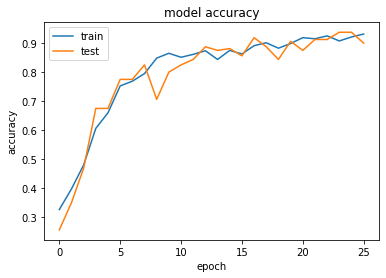

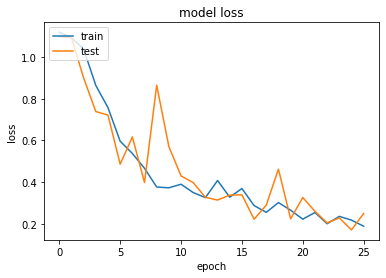

In [12]:
# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 000003.jpg to 000003 (3).jpg
000003.jpg
cat


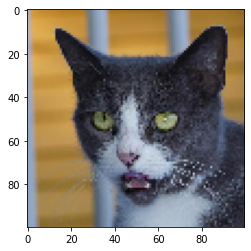

In [14]:
# prediksi dengan upload gambar
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=15)
  
  print(fn)
  if classes[0, 0] == 1:
    print('cat')
  elif classes[0, 1] == 1:
    print('dog')
  elif classes[0, 2] == 1:
    print('wild')

In [15]:
# Konversi model menjadi format TF-Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp2q3v0hty/assets


In [16]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)